In [1]:
from scipy import *

# Round-Robin Problem

## Problem Description

设有n个运动员要进行网球循环赛。设计 一个满足下列条件的比赛日程表： 
* 每个选手必须与其他 $n-1$ 个选手各赛一次； 
* 每个选手一天只能赛一次； 
* 当 $n$ 是偶数时，循环赛进行 $n-1$ 天。
* 当 $n$ 是奇数时，循环赛进行 $n$ 天。

## Problem Analysis

我们在课堂上讨论过这个问题的一个特殊的情况：$n = 2^k$。

这个特殊的情况保证我们每次都能将选手等分，这样一来我们就可以利用**分治**的策略解决问题：每次把参赛选手平均分成两组，先递归地让他们进行内部的循环赛（并且这两组的情况完全对称）；内部赛结束后，两组选手再与彼方小组的成员比赛。这时候两组人数相同，只需依次进行比赛即可。如下图所示。
![image_1cbjk539n17qc17tu1grm1cok182u2n.png-33.4kB][7]
 [7]: http://static.zybuluo.com/EtoDemerzel/uljoo50rezmmtgoyn0sld2z9/image_1cbjk539n17qc17tu1grm1cok182u2n.png

对于一般的 $n$, 我们并不能保证每次都能**等分**。事实上，只要 $n$ 不是 $2$ 的幂次，在划分过程中一定会出现奇数的情况。为了模拟上面的情况，在出现奇数时，我们采用**引入一个虚拟选手**的做法，使选手人数重新变为偶数，从而可以等分。

对于一个规模为 $n$ 的问题，安排的日程表中出现虚拟选手意味着与他交手的选手在当轮轮空。而当我们要从规模为 $\lfloor \frac{n}{2}\rfloor$ 的问题得到 $n$ 个选手的循环赛日程表时，由于两组的对称性，**虚拟选手出现的位置将完全对称**，那么我们可以给同时轮空的两个选手安排一场比赛。之后再使两组的选手依次与对组选手交手。这样我们实现了比赛时间的最小化。

## Data structure

我们考虑用**一个矩阵**来存储这个日程表。其中每一行代表一个选手，每一列代表一天，矩阵中的元素代表对手。
例如，矩阵第 $i$ 行,第 $j$ 列上的元素，就是选手 $i$ 在第 $j$ 天比赛的对手。

![image_1cbjld79ve3eviq1thh161t18iv34.png-11kB][dia]
 [dia]: http://static.zybuluo.com/EtoDemerzel/rp6lkc3tu6d65kcqnlr0p4fw/image_1cbjll0dl1ac31n071qgh1f231fcs29.png

## Algorithm example

这里我们以6个选手为例，详述我们的算法。我们将仅描述从 $3$ 个选手的子问题合并到 $6$ 个选手的原问题的步骤。
首先我们对 $3$ 个选手的情况求解，结果里出现了虚拟选手； $1-3$ 号与 $4-6$ 号情况完全一致。如下图：
![image_1cbjljson1qgjk2uv6a1s775g419.png-14.3kB][1]
[1]:http://static.zybuluo.com/EtoDemerzel/o16sndvlgibvam0p8io1hpen/image_1cbjljson1qgjk2uv6a1s775g419.png

由于对称性，我们注意到 $i$ 号和 $i+3$ 号总是同时轮空，因此当他们轮空时，我们可以给他们安排比赛。如下图：

![image_1cbjlrmj0c4s1ogdr31h5q1aq72m.png-15.9kB][3]
 [3]: http://static.zybuluo.com/EtoDemerzel/zksji75enxoc3p2juaorpt3b/image_1cbjlrmj0c4s1ogdr31h5q1aq72m.png
 
接下来要进行的是组间的比赛。对于第一个组中的 $i$，由于 $i$ 和 $i+3$ 可能已经比赛过，因此，第 $i$ 个选手的第 $4$ 天的对手从 $i+4$ 开始，依次增加，如果超过了 $6$, 我们再填上 $i + 3$。每行皆如此。如下图：
![image_1cbjm1hma12u1iqffcj1nop1gte33.png-17.6kB][4]
  [4]: http://static.zybuluo.com/EtoDemerzel/x7vogsujz4m8v3jshe7q1gg7/image_1cbjm1hma12u1iqffcj1nop1gte33.png

这样，我们通过这个例子完成了对算法的描述。

## Implementation

In [2]:

def roundRobin(n):
    '''
    Scheduling for the round robin tournament.
    
    Parameters:
    n -- the number of players. Could be any positive integers.
    
    Returns:
    
    schedule -- the schedule for the round robin tournament.
    Each row represent the opponents of a player, listed in time order.
    When n is even, schedule should be an n*(n-1) matrix;
    When it is odd, the size should be (n+1)*n with a virtual player.
    The virtual player's number exceeds n.
    '''
    if n & 1:
        n += 1
    
    # base case
    if n == 2:
        return array([[2],[1]]) # 2>n, so it represent a virtual player
    


        
    # n is now an even number, the tournament need n-1 days to complete    
    schedule = zeros((n, n-1)) 
    
    # divide
    half = n // 2
    half_case = roundRobin(half) 
    
    # conquer
    # print('half_case shape', half_case.shape)
    # first list the inner schedule into the total
    for i in range(half):
        schedule[i, 0: half_case.shape[1]] = half_case[i,:]
        #print(half_case.shape)
        assert(i + half < n)
        schedule[i + half, 0:half_case.shape[1]] = half_case[i, :] + half
        
    # eliminate the needless virtual players
    for i in range(half):
        bye = schedule[i,:] > half  #originally draw a bye
        
        # due to the symmetry of i and i + half
        schedule[i, bye] = i + half + 1
        schedule[i + half, bye] = i + 1
        
    
    # games between groups
    for i in range(half):
        x = i + half + 2
        if x > n:
            x -= half
            
        for j in range(half_case.shape[1], n - 1):
            schedule[i, j] = x
            schedule[x - 1, j] = i + 1
            x += 1
            if x > n:
                x -= half

    return schedule
    

如果 $n$ 为偶数，上述函数返回的就是最终的结果矩阵；如果 $n$ 为奇数，这个函数返回的矩阵的前 $n$ 行（去掉虚拟选手的赛程）是我们结果矩阵，且如果矩阵中出现了大于 $n$ 的数字，表明这一轮该选手轮空。为了方便观察，我们写如下函数：

In [3]:
def show_mat(mat, n):
    '''
    show the schedule matrix.
    
    Parameters:
    mat -- the result matrix from the function roundRobin.
    n -- the number of players.
    
    returns:
    None. 
    We simply print the result in a beautified way.
    '''
    

    for i in range(n):
        x = list(array(mat[i,:], dtype = int))
        virtual = [i for i in range(len(x)) if x[i] > n]
       
        if len(virtual) > 0:
            x[squeeze(virtual)] = None # None implies no match that day
            
      
        print('The schedule for player', i + 1, 'is:', x)

简单看一下结果，我们挑选了 $n = 4k, 4k+1, 4k+2, 4k+3$ 的多种样例：

In [4]:
#case 1
show_mat(roundRobin(1),1)
print('-------------------------------------------------')
#case 2
show_mat(roundRobin(3),3)
print('-------------------------------------------------')
#case 3
show_mat(roundRobin(8), 8)
print('-------------------------------------------------')
#case 4
show_mat(roundRobin(15),15)
print('-------------------------------------------------')
#case 5
show_mat(roundRobin(14),14)

The schedule for player 1 is: [None]
-------------------------------------------------
The schedule for player 1 is: [2, None, 3]
The schedule for player 2 is: [1, 3, None]
The schedule for player 3 is: [None, 2, 1]
-------------------------------------------------
The schedule for player 1 is: [2, 4, 3, 6, 7, 8, 5]
The schedule for player 2 is: [1, 3, 4, 7, 8, 5, 6]
The schedule for player 3 is: [4, 2, 1, 8, 5, 6, 7]
The schedule for player 4 is: [3, 1, 2, 5, 6, 7, 8]
The schedule for player 5 is: [6, 8, 7, 4, 3, 2, 1]
The schedule for player 6 is: [5, 7, 8, 1, 4, 3, 2]
The schedule for player 7 is: [8, 6, 5, 2, 1, 4, 3]
The schedule for player 8 is: [7, 5, 6, 3, 2, 1, 4]
-------------------------------------------------
The schedule for player 1 is: [2, 4, 3, 6, 7, 8, 5, 10, 11, 12, 13, 14, 15, None, 9]
The schedule for player 2 is: [1, 3, 4, 7, 8, 5, 6, 11, 12, 13, 14, 15, None, 9, 10]
The schedule for player 3 is: [4, 2, 1, 8, 5, 6, 7, 12, 13, 14, 15, None, 9, 10, 11]
The schedule 

## Correctness checking

我们需要验证算法的正确性。
怎样的结果是正确的：
* 每一行是 $[1,n]$ 的不重复数字，且应包含除行数以外的所有数字。
* 每一列除了轮空时有一个数字大于 $n$, 其他应是 $[1,n]$ 上的不重复数字，并且应该全部出现。 
* 对所有的 $i$, 如果
```python
schedule[i,j] = k
```
就有
```python
schedule[k-1,j] = i+1
```

In [60]:
def check(mat, n):
    '''
    To check the correctness of our algorithm
    
    Parameters:
    
    mat -- the matrix gained from the function roundRobin.
    
    n -- the parameter for roundRobin. Actually it is needless, since we can
    determine its value through mat's shape, but with it it is more convenient.
    
    Returns:
    
    if return True, it means our algorithm works correctly. Else it is incorrect.
    '''
    # check the properties about rows
    for i in range(n):
        b = in1d(list(range(1, n+1)), mat[i,:]) # check whether the numbers from 1 to n is in the i-th row of mat
        
        
        assert(squeeze(where(b == False)).shape == ()) # to assure there is only 1 number missing i.e. the row number
        if squeeze(where(b == False)) != i:  # to check if the missing number is the row number
            print(squeeze(where(b == False)))
            return False
        
        if i == n-1 and n&1 == 0:
            pass # if n is even there is only n-1 columns
        else:
            c = in1d(list(range(1, n+1)), mat[:,i]) # check whether the numbers from 1 to n is in the i-th column of mat
            if squeeze(where(c == False)).shape[0] != 0:
                return False
            
            # check whether there at most 1 larger than n
            d = in1d(mat[:,i], list(range(1,n+1))) 
            skip = squeeze(where(d == False))
            assert(skip.shape == () or skip.shape == (0,))
            if skip.shape == (0,) and mat[skip, i] <= n:
                return False
            
        # check whether schedule[i,j] = k implies schedule[k-1,h] = i+1
        for j in range(mat.shape[1]):
            k = int(mat[i,j])
            if mat[k-1,j] != i+1:
                print(i)
                print(mat[k,j])
                return False
            
    
    # check the properties about columns
    
        
    return True     

由于循环赛参与者不太可能太多，我们仅检验 $n$ 在 $1-200$ 范围内算法的正确性： 

In [61]:
result = True
for i in range(1,201):
    result = result and check(roundRobin(i),i)
    
print(result)

True


这样，我们认为我们的算法是正确的。

## Complexity analysis

根据上面的讨论，我们可以得出 $$T(n) = T(\frac{n}{2}) + O(n^2)$$

根据主定理，我们知道 $$T(n) = \Theta(n^2)$$
下面我们通过测对不同大小的情况程序的运行时间来进行测试。

In [79]:
import time

def comp_test():
    runtime = []
    for i in range(1,1001):
        tic = time.time()
        roundRobin(i)
        toc = time.time()
        runtime.append(toc - tic)
        if i % 50 == 0:
            print('current:', i)
    return runtime

In [82]:
runtime = comp_test()

current: 50
current: 100
current: 150
current: 200
current: 250
current: 300
current: 350
current: 400
current: 450
current: 500
current: 550
current: 600
current: 650
current: 700
current: 750
current: 800
current: 850
current: 900
current: 950
current: 1000


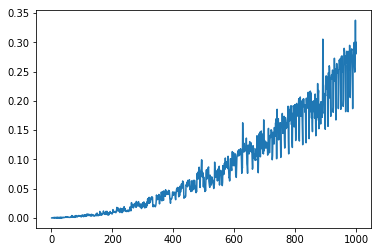

In [83]:
from matplotlib.pyplot import *
% matplotlib inline

plot(list(range(1,1001)), runtime)

从上面的图像我们发现代码的运行时间大致与 $n$ 的大小成二次方关系，这验证了我们刚才的分析。